In [40]:
import numpy as np
from sklearn.manifold import TSNE as TSNE
import matplotlib.pyplot as plt

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://scikit-learn.org/stable/modules/manifold.html#t-sne

class sklearn.manifold.TSNE(n_components=2, 
                            perplexity=30.0, 
                            early_exaggeration=12.0, 
                            learning_rate=200.0, 
                            n_iter=1000, 
                            n_iter_without_progress=300, 
                            min_grad_norm=1e-07, 
                            metric='euclidean', 
                            init='random', 
                            verbose=0, 
                            random_state=None, 
                            method='barnes_hut', 
                            angle=0.5, 
                            n_jobs=None)

o perplexity is essentially the number of nearest neighbors considered when computing the conditional probabilities
o says online that the maximum number of iterations is usually high enough and does not need any tuning
o during early exaggeration the joint probabilities in the original space will be artificially increased by multiplication with a given factor. Larger factors result in larger gaps between natural clusters in the data. If the factor is too high, the KL divergence could increase during this phase. Usually it does not have to be tuned.
o learning rate: if it is too low gradient descent will get stuck in a bad local minimum. If it is too high the KL divergence will increase during optimization.
o angle, is a tradeoff between performance and accuracy. Larger angles imply that we can approximate larger regions by a single point, leading to better speed but less accurate results.

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data 
points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the 
joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has 
a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data 
or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) 
if the number of features is very high. This will suppress some noise and speed up the computation 
of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ.

Methods

fit(self, X[, y])               Fit X into an embedded space.

fit_transform(self, X[, y])     Fit X into an embedded space and return that transformed output.

get_params(self[, deep])        Get parameters for this estimator.

set_params(self, \*\*params)    Set the parameters of this estimator.

In [10]:
# sample code
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)

print(X_embedded)
print(X_embedded.shape)

[[ -32.63168      2.0344007]
 [ -25.902143  -157.87627  ]
 [-109.219376   -81.285576 ]
 [  50.685528   -74.55626  ]]
(4, 2)


<function matplotlib.pyplot.show(*args, **kw)>

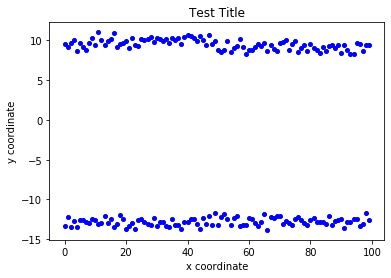

In [62]:
size_cluster_one = 50
size_cluster_two = 50
dimension = 50

cluster_one = []
cluster_one_mean    = -100
cluster_one_std     = 1

cluster_two = []
cluster_two_mean    = 100
cluster_two_std     = 1

for i in range(size_cluster_one):
    cluster_one.append(np.random.normal(cluster_one_mean, cluster_one_std, dimension))
    
for i in range(size_cluster_two):
    cluster_two.append(np.random.normal(cluster_two_mean, cluster_two_std, dimension))

data = np.append(cluster_one, cluster_two, axis=0)
X_embedded = TSNE(n_components=2, perplexity=40).fit_transform(data)

# print(data)
# print()
# print(X_embedded)

plt.plot(X_embedded, color = 'b', marker = 'o', markersize = 4, linewidth=0)
title = "Test Title"
plt.title(title)
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show